In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.table import Table
from astropy.visualization import ZScaleInterval, ImageNormalize, MinMaxInterval, PowerStretch
from astropy.wcs import WCS
import matplotlib.colors as colors
#from astropy.visualization.wcsaxes import WCSAxes
from matplotlib.path import Path
import astropy.coordinates as coord
import astropy.units as u


import streamsculptor
from streamsculptor import  potential
from streamsculptor import fields
from streamsculptor import JaxCoords as jc
import diffrax
from jax.scipy.stats import gaussian_kde
import jax
import equinox as eqx
jax.config.update("jax_enable_x64", True)


from gala.units import UnitSystem
from astropy import units as u
usys = UnitSystem(u.kpc, u.Myr, u.Msun, u.radian)
import jax.numpy as jnp


import gala.coordinates as gc
from functools import partial
from gala.units import galactic

import tqdm
#import scienceplots
import matplotlib as mpl
#plt.style.use('science')
mpl.rcParams['text.usetex'] = False ## We do not have LaTex on stellar HPC...
from astropy.constants import G as G_
#import tqdm
G_jax = jnp.array(G_.to(u.kpc**3 / (u.Msun * u.Myr**2)).value)

from scipy.interpolate import UnivariateSpline
#from scipy.integrate import cumtrapz

from jax import random

## I 

In [2]:
!hostname

node894.cluster


/groups/astro/sapearso/miniforge3/envs/jax_test2/lib/python3.12/pty.py:95: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [3]:
from matplotlib.path import Path

In [4]:
from astropy.table import Table
table = Table.read('polycoords_W17_short.ecsv', format='ascii.ecsv')


In [5]:
# Extract RA and Dec values
ra = table['ra'].value
dec = table['dec'].value

# Stack RA and Dec into (N, 2) array for Path
coords = np.column_stack((ra, dec))
#print(coords)

# Create the Path
from matplotlib.path import Path
polygon_path_southern = Path(coords)

In [6]:
#insert Julie's path here. 

In [7]:
# polygon_path_southern = Path(np.array([[212.30942241518892 , 51.22588321300892],
# [212.30923389341677 , 51.22583461789639],
# [212.3092893244039 , 51.22577211322397],
# [212.3094001919801 , 51.22567488157779],
# [212.30956651092805 , 51.225612367243684],
# [212.30973282942415 , 51.2255498526739],
# [212.3098769666822 , 51.225473450967684],
# [212.3099989226822 , 51.22538316220677],
# [212.31013196858842 , 51.225299816746976],
# [212.3102428332467 , 51.22520258430476],
# [212.3103536974366 , 51.225105351757826],
# [212.31045347079345 , 51.22500117570976],
# [212.310575424411 , 51.224910886349754],
# [212.31065301615214 , 51.22479282335913],
# [212.31068624621773 , 51.2246469868258],
# [212.31073056635697 , 51.22450809365431],
# [212.31071943839973 , 51.22434837250868],
# [212.31066396335643 , 51.224216433416416],
# [212.31059740185535 , 51.22409143980362],
# [212.31053084071576 , 51.22396644615304],
# [212.31050863358254 , 51.223841448262846],
# [212.31073039837884 , 51.22382753811374],
# [212.3108967401489 , 51.22389002189192],
# [212.31099656226795 , 51.223994178710825],
# [212.31108529813326 , 51.2241052809966],
# [212.31115186097918 , 51.224230274332555],
# [212.3112184241866 , 51.224355267630706],
# [212.3112849877555 , 51.224480260891035],
# [212.3112850237103 , 51.22461914977651],
# [212.3112296147159 , 51.2247510998342],
# [212.31117420540383 , 51.224883049865724],
# [212.31110770530915 , 51.22500805653648],
# [212.31099684294668 , 51.22510528979566],
# [212.3109081610758 , 51.22521640966009],
# [212.3108305692751 , 51.225334472819334],
# [212.31070861503576 , 51.225424762444405],
# [212.31057556981278 , 51.22550810855791],
# [212.3104425241079 , 51.22559145452059],
# [212.31025402544543 , 51.22564008326672],
# [212.31010988829158 , 51.225716485436024],
# [212.30993247923394 , 51.22577205709457],
# [212.30976616020612 , 51.22583457194731],
# [212.30956656939145 , 51.22587625612688]]), None)

In [8]:
#polygon_path_southern

In [9]:
#polygon_path_southern-10

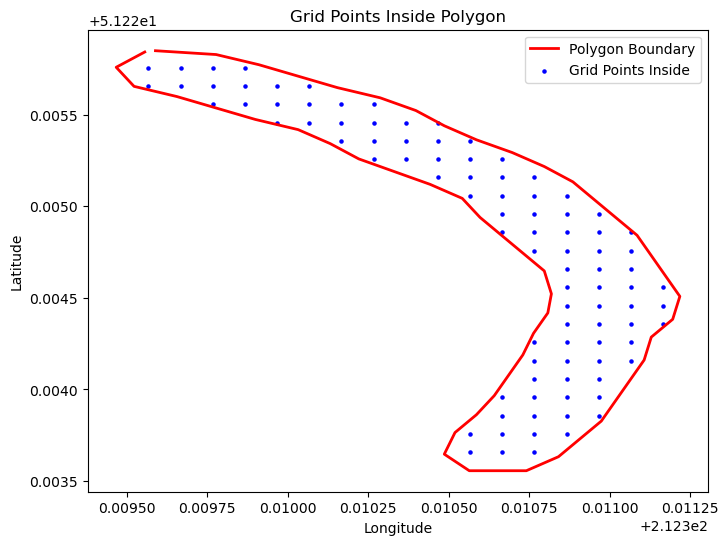

In [10]:
# Step 1: Define the bounding box
x_min, y_min = np.min(polygon_path_southern.vertices, axis=0)-0.1
x_max, y_max = np.max(polygon_path_southern.vertices, axis=0)+0.1

# Step 2: Create a grid of points
grid_spacing = 0.0001  # Adjust this value to refine the grid density
x_grid = np.arange(x_min, x_max, grid_spacing)
y_grid = np.arange(y_min, y_max, grid_spacing)
xx, yy = np.meshgrid(x_grid, y_grid)
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Step 3: Select points inside the polygon
inside_mask = polygon_path_southern.contains_points(grid_points)
inside_points = grid_points[inside_mask]

# Step 4: Plot results
plt.figure(figsize=(8, 6))
plt.plot(*polygon_path_southern.vertices.T, 'r-', lw=2, label="Polygon Boundary")


plt.scatter(inside_points[:, 0], inside_points[:, 1], s=5, color='blue', label="Grid Points Inside")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.title("Grid Points Inside Polygon")
plt.show()

In [11]:
# inside_points[:, 1]

In [12]:
# #from astropy.coordinates import SkyCoord, EarthLocation

# ra_s = inside_points[:, 0]
# dec_s = inside_points[:, 1]


ra_MaybeClusterStream = inside_points[:, 0]
dec_MaybeClusterStream  = inside_points[:, 1]


In [13]:
#ra_MaybeClusterStream 

In [14]:
#Transformation of the coordinates

UDG_distance =  35.2*u.Mpc #distance to M83 - Radburn-Smith et al. 2011
    
#First use distance to define skycoords of M83 in ICRS
#UDG skypos
c_UDG = coord.SkyCoord(ra =212.30396766*u.deg, dec = 51.22480048*u.deg,\
                        distance = UDG_distance )

# Ans also the stream in ICRS
# stream pos
GC_distance = UDG_distance

#ra and dec measured by eye in ds9
pos = coord.SkyCoord(212.30914294*u.deg, 51.22568583*u.deg,\
                         distance = UDG_distance) #Oliver Muller's coordinates2011







MaybeCluster_points = coord.SkyCoord(ra_MaybeClusterStream *u.deg, dec_MaybeClusterStream *u.deg, distance = UDG_distance)
#red_points = coord.SkyCoord(ra_pts*u.deg, dec_pts*u.deg,\
               #          distance = dw3_distance)

#Pixel coordinates (bin centers)
#points_skycoord = coord.SkyCoord(ra=ra_x_pts *u.deg, dec=dec_y_pts *u.deg, distance = M83_distance)
   
alpha = 0

#Define reference frame centered on M83
class UDGGalactocentric(coord.BaseCoordinateFrame):
    """
    Position at the center of M83
    """

    default_representation = coord.CartesianRepresentation
    default_differential = coord.CartesianDifferential

    # Frame attributes
    UDG_sky_coord = coord.CoordinateAttribute(
        frame=coord.ICRS,
        default=coord.SkyCoord(c_UDG.ra.deg, c_UDG.dec.deg, unit=u.deg)
    )

    UDG_distance = coord.QuantityAttribute(
        default= UDG_distance,# * u.Mpc,
        unit=u.Mpc
    )
    #alpha = 0
    alpha = coord.QuantityAttribute(
        default=alpha,
        unit=u.deg

    )
    
from astropy.coordinates.matrix_utilities import rotation_matrix   
def get_icrs_to_UDG_transform(UDG_frame, icrs_frame, inverse=False):
        """
        Go from ICRS to Cen A coordinates."""
        
        # print(alpha)
        # Rotation matrix to go from M83 to ICRS - ?????????????????????????
        Rz = rotation_matrix(-UDG_frame.UDG_sky_coord.ra, 'z')
        Ry = rotation_matrix(UDG_frame.UDG_sky_coord.dec, 'y')
        Rx = rotation_matrix(UDG_frame.alpha, 'x')
        R = Rz @ Ry @ Rx
        
        # Positional offset to the center of Cen M83 (from ICRS)
        dpos = coord.CartesianRepresentation(UDG_frame.UDG_distance * [1., 0, 0])

        #if inverse:  # Cen A to ICRS
            #A = R
            #b = (dpos).transform(A)

        # ICRS to Cen A
        A = R.T
        b = -dpos

        return A, b

    
@coord.frame_transform_graph.transform(
    coord.transformations.AffineTransform,
    coord.ICRS,
    UDGGalactocentric
)

def icrs_to_UDG(icrs_coord, UDG_frame):
    return get_icrs_to_UDG_transform(UDG_frame, icrs_coord)\

# Use M83 Galactocentric frame to get stream progentor pos
stream_pos_GC = pos.transform_to(UDGGalactocentric())
#stream_pos_kpc = stream_pos_GC.cartesian.xyz.to(u.kpc)
    
c_UDG_GC = c_UDG.transform_to(UDGGalactocentric())
#red_points_GC = red_points.transform_to(M83Galactocentric())




#pts_GC = points_skycoord.transform_to(M83Galactocentric())
#print(stream_pos_GC)

#print(pts_GC)
#np.save('pts_GC', pts_GC)


In [15]:
MaybeCluster_points_GC = MaybeCluster_points.transform_to(UDGGalactocentric())

In [16]:
#south_points_GC.x*u.kpc
#MaybeCluster_points_GC

In [17]:
from astropy.coordinates import SkyCoord
# dat_x_filtered = np.load('dat_x_filtered.csv.npy')
# dat_z_filtered = np.load('dat_z_filtered.csv.npy')

# x_prog = 8.68
# y_prog = 0.07
# z_prog = 24.36

# x_centers = np.loadtxt('x_centers.txt')
# y_centers = np.loadtxt('y_centers.txt')

# pts_GC = np.load('pts_GC.npy',allow_pickle=True)
# pts_GC = SkyCoord(pts_GC)

# #print(dat_x_filtered)

# #print(pts_GC)

Text(0, 0.5, 'z [kpc]')

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


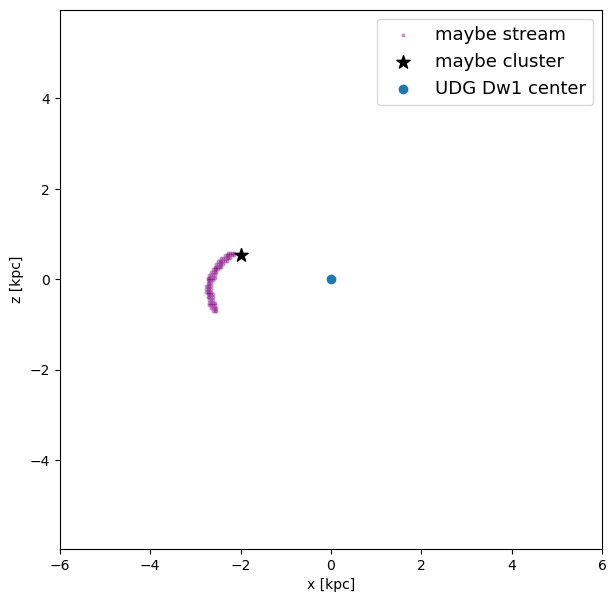

In [18]:
#Visualize red points, stream progenitor and host galaxy in galactocentric coordinate system
plt.figure(figsize=(7,7))
plt.axis('equal') 
# "hack" below to create a coordinate system where the skyplane is in x,z 
# and the perpendicular (line-of-sight, los) directions is along the y axis

#plt.scatter(dat_x_filtered, dat_z_filtered,  color='blue', s=2)
plt.scatter(-MaybeCluster_points_GC.y.to(u.kpc).value, MaybeCluster_points_GC.z.to(u.kpc).value,  color='purple', alpha=0.3,s=4, label='maybe stream')

plt.scatter(-stream_pos_GC.y.to(u.kpc).value, stream_pos_GC.z.to(u.kpc).value,  color='black',marker='*', s=100, label='maybe cluster')
#plt.scatter(dat_x_filtered[::4], dat_z_filtered[::4],  color='red', s=2)


plt.scatter(-c_UDG_GC.y.to(u.kpc).value, c_UDG_GC.z.to(u.kpc).value, label= 'UDG Dw1 center')
plt.legend(fontsize=13)
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.xlabel('x [kpc]')
plt.ylabel('z [kpc]')

In [19]:
#-south_points_GC.y.to(u.kpc).value

In [20]:
#dat_x_filtered

In [21]:
#pos_today_true = np.array([-stream_pos_GC.y.to(u.kpc).value,0, stream_pos_GC.z.to(u.kpc).value])

In [22]:
##SP

#now adding the new data to dat x, z

dat_x = -MaybeCluster_points_GC.y.to(u.kpc).value
dat_z = MaybeCluster_points_GC.z.to(u.kpc).value

/tmp/ipykernel_29531/1781110135.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=13)


Text(0, 0.5, 'z [kpc]')

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


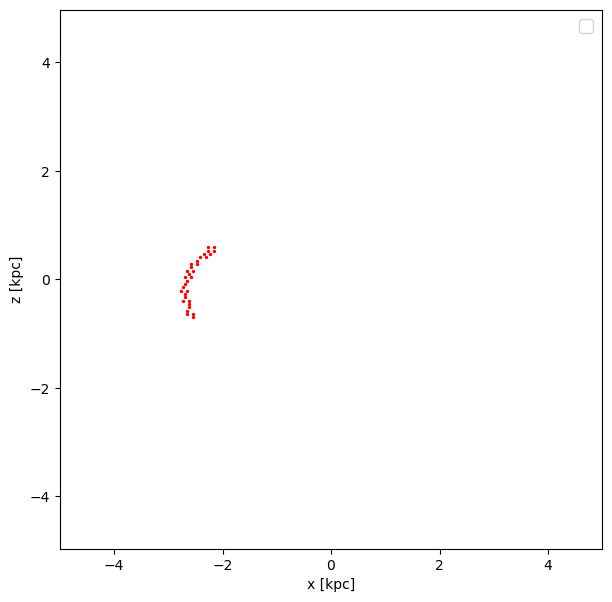

In [23]:
#Visualize red points, stream progenitor and host galaxy in galactocentric coordinate system
plt.figure(figsize=(7,7))
plt.axis('equal') 
# "hack" below to create a coordinate system where the skyplane is in x,z 
# and the perpendicular (line-of-sight, los) directions is along the y axis

#plt.scatter(dat_x_filtered, dat_z_filtered,  color='blue', s=2)
#plt.scatter(-south_points_GC.y.to(u.kpc).value, south_points_GC.z.to(u.kpc).value,  color='purple', s=4)

plt.scatter(dat_x[::3],dat_z[::3],  color='red', s=2)

plt.legend(fontsize=13)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.xlabel('x [kpc]')
plt.ylabel('z [kpc]')

In [24]:
#dat_x

In [25]:
#Append dat_z_filtered with new points above !

#-stream_pos_GC.y.to(u.kpc).value, stream_pos_GC.z.to(u.kpc).value,

In [26]:

# #also for progenitor
x_prog = -stream_pos_GC.y.to(u.kpc).value
y_prog = stream_pos_GC.x.to(u.kpc).value #sæt til 0
z_prog = stream_pos_GC.z.to(u.kpc).value

#print(dat_x)

In [27]:
jax.devices()

[CudaDevice(id=0)]

In [28]:
# Select which GPU you want on astro 01
#jax.default_device('CudaDevice(id=2)')
#Check that you're running on GPU
# Check that Jax works  on GPU - should print GPU
from jax.lib import xla_bridge
print(xla_bridge.get_backend().platform)

gpu


/tmp/ipykernel_29531/3331831100.py:6: DeprecationWarning: jax.lib.xla_bridge.get_backend is deprecated; use jax.extend.backend.get_backend.
  print(xla_bridge.get_backend().platform)


In [29]:
# To resolve potential well enough we need the general_nfw_interp.npy file 
interp_func = jnp.load('../general_nfw_interp.npy',allow_pickle=True).item() 
@jax.jit
def generalized_nfw_potential(xyz, t, params):
    r = jnp.sqrt(jnp.sum(xyz**2)) 
    r_over_r_s = r/params['r_s']
    bracket = interp_func(r_over_r_s,params['gamma'],params['beta'])*(params['r_s']**2)
    return -4*jnp.pi*G_jax*bracket*params['rho0']


params = dict(gamma=1.0,beta=3, r_s=10.0, rho0=1e7) #An example of parameters to check that it works

In [30]:
#check that it works
generalized_nfw_potential(jnp.array([1.0,2.0,3.0]),0.0, params) #It works

Array(-0.04455536, dtype=float64)

In [31]:
#Not sure what this does
from streamsculptor.potential import CustomPotential
def get_general_NFW_potential(params):
    pot = lambda xyz, t: generalized_nfw_potential(xyz, t, params)
    return CustomPotential(potential_func=pot, units=usys)

#Test
get_general_NFW_potential(params).potential(jnp.array([1.0,2.0,3.0]),0.0)

Array(-0.04455536, dtype=float64)

In [32]:
#Calculate rho0 from nfw profile:
@jax.jit
def get_nfw_rho0(M,r_s):
    c_NFW = 5.# UDG # 15#following https://arxiv.org/pdf/2211.04495 #Should I change this?
    denom = jnp.log(1. + c_NFW) - (c_NFW/(1+c_NFW))
    fac = 1./denom
    rho0 = (M/(4*jnp.pi*r_s**3))*fac
    return rho0
np.log10(get_nfw_rho0(3e12,22.))

np.float64(7.369084699988621)

In [33]:
from streamsculptor.potential import MiyamotoNagaiDisk
from streamsculptor import potential

In [34]:
from functools import partial
# Define potential with halo and disk

def get_potential(params):
    #The disk is the stars in the galaxy
    # m sets the mass of the disk, a is the scale length and b is the scale height of the disk
    pot_disk =  MiyamotoNagaiDisk(m=params['m_disk'], a=params['a_disk'],b=params['b_disk'],units=usys)


    rho0 = get_nfw_rho0(params['M'],params['r_s'])
    
    pot_halo = get_general_NFW_potential(dict(rho0=rho0, gamma=params['gamma'], beta=params['beta'],
                                              r_s=params['r_s']))

    #I only use halo...
    potential_list = [pot_halo]
    pot = potential.Potential_Combine(potential_list=potential_list,units=usys)
    return pot




@partial(jax.jit,static_argnums=(15,))
def gen_stream(x_prog=None, 
               y_prog=None, 
               z_prog=None, 
               log10_M_prog=None, 
               speed=None, 
               vel_theta=None, 
               vel_phi=None, 
               log10_m_disk=None, 
               a_disk=None,
               b_disk=None, 
               log10_m_halo=None, 
               r_s=None, 
               gamma=None, 
               beta=None, 
               t_age=None, 
               N_arm=None,
               offset=jnp.array([-40,0.0,140.0,0.0,0.0,0.0])):
    """
    x and z is sky plane, y is LOS
    xyz_prog is the progenitor position today in these coords
    speed is the total speed of the prog.
    vel_theta controls the spherical polar direction of the unit velocity vector [0,pi]
    vel_phi controls the azimuthal direction of the unit velocity vector [0,2pi]
    """
    params = {'m_disk':10**log10_m_disk, 'a_disk': a_disk, 'b_disk': b_disk, 'M': 10**log10_m_halo,
                          'r_s': r_s, 'gamma': gamma, 'beta':beta, 't_age':t_age}
    pot = get_potential(params)
    v_x_hat = jnp.sin(vel_theta)*jnp.cos(vel_phi)
    v_y_hat = jnp.sin(vel_theta)*jnp.sin(vel_phi)
    v_z_hat = jnp.cos(vel_theta) #SP moved
    velocity_today = jnp.array([v_x_hat, v_y_hat, v_z_hat])*speed
    

    pos_today = jnp.array([x_prog, y_prog, z_prog])
    w_today = jnp.hstack([pos_today, velocity_today])
    
    ts = jnp.linspace(-t_age,0,N_arm) #4_000



    
    w_init = pot.integrate_orbit(w0=w_today, t0=0.0, t1=-t_age, ts=jnp.array([-t_age]),
                                solver=diffrax.Tsit5(),atol=1e-6, rtol=1e-6,dtmin=0.5,max_steps=20_000).ys[0]

    #    save_times_orbit = jnp.linspace(t0=0, t1, n_stripping_times)
    save_times_orbit = jnp.linspace(0,t_age, 1000)
    prog_orb = pot.integrate_orbit(w0=w_init,              
                                     ts=save_times_orbit, 
                                     solver=diffrax.Tsit5(), 
                                     max_steps=10_000, 
                                     rtol=1e-6, 
                                     atol=1e-6, 
                                 dtmin=0.5)
    
    ## Now generate a mock stream along the above orbit
    Msat = 10**log10_M_prog #progenitor mass
    seed = 4031
    kval_arr=jnp.array([1.3,0.0,0.0,0.0,.5,.5,.6,0.0])
    lead_arm, trail_arm = pot.gen_stream_vmapped(prog_w0=w_init, ts=ts, Msat=Msat, seed_num=seed,
                                                solver=diffrax.Tsit5(),atol=1e-6, rtol=1e-6,dtmin=0.5,
                                                kval_arr=kval_arr, max_steps=20_000)
    stream = jnp.vstack([lead_arm,trail_arm])
    return dict(w_today=w_today, prog_orb = prog_orb, stream=stream, stripping_times=jnp.hstack([ts, ts]))
#

In [35]:
#xlin

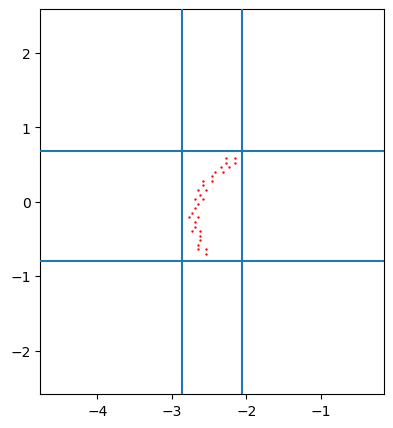

In [36]:
#SP now looking at the outer stream only, so selecting H_proj1_out and xlin_outer,zlin_outer
#from now on the coordinates are correct in x,z as plane of sky

#dat_inner = jnp.vstack([xpts_inner, zpts_inner]).T
# drawing bounds to not penalize stream from being longer than control points dictate 
pad = 0.09
xbounds = jnp.array([dat_x.min()-pad, dat_x.max()+pad])
zbounds = jnp.array([dat_z.min()-pad, dat_z.max()+pad])


#dat_inner = jnp.vstack([xpts_inner, zpts_inner]).T


fig, ax = plt.subplots(1,1)
fig.set_size_inches(8,5)

#ax.pcolormesh(xlin_inner,zlin_inner,H_proj1_inner,cmap='binary')
ax.scatter(dat_x[::3],dat_z[::3],color='r',s=.5)
#ax.scatter(outer_stream_dict['stream'][:,0],outer_stream_dict['stream'][:,2],s=0.06,color='g',zorder=3,)

xlin = jnp.linspace(np.min(-MaybeCluster_points_GC.y.to(u.kpc).value)-2,np.max(-MaybeCluster_points_GC.y.to(u.kpc).value+2),200)
zlin = jnp.linspace(np.min(-MaybeCluster_points_GC.z.to(u.kpc).value)-2,np.max(MaybeCluster_points_GC.z.to(u.kpc).value+2),200)

ax.set_xlim(xlin.min(), xlin.max())
ax.set_ylim(zlin.min(),zlin.max())


ax.vlines(xbounds[0],-1e5,1e5,zorder=50)
ax.vlines(xbounds[1],-1e5,1e5,zorder=50)
ax.hlines(zbounds[0],-1e5,1e5,zorder=50)
ax.hlines(zbounds[1],-1e5,1e5,zorder=50)

ax.set_aspect('equal')




In [37]:
#SP now we need to make kde for method to compare to, KDE from control points

@jax.jit
def regional_weight_func(xloc, zloc, xbounds, zbounds,scale_fac=.5):
    arg=( (xloc - jnp.mean(xbounds)) / (scale_fac*(xbounds[1]-xbounds[0])) )**2 + ( (zloc - jnp.mean(zbounds)) / (scale_fac*(zbounds[1]-zbounds[0])) )**2
    return jnp.exp(-0.5*arg)
   
regional_weight_func(-29.,120.,xbounds,zbounds)

mapped_weight_func = jax.vmap(regional_weight_func,in_axes=(0,0,None,None,None))

In [38]:
jax.jacfwd(regional_weight_func,argnums=(0,1,))(21.,120.,xbounds,zbounds,.5)

(Array(-0., dtype=float64), Array(-0., dtype=float64))

In [39]:
@jax.jit
def kde_fit_and_eval(x_stream, z_stream, x_eval, z_eval,bw=.1):
    in_bounds = (x_stream > xbounds[0]) & (x_stream < xbounds[1]) & (z_stream > zbounds[0]) & (z_stream < zbounds[1])
    weights_init = jnp.where(in_bounds, 1.0, 0.0)
    inp = jnp.vstack([x_stream, z_stream])
    inp_eval = jnp.vstack([x_eval, z_eval])
    #bw = .1 #was .15
    denom = gaussian_kde(inp,bw_method=bw,weights=weights_init).pdf(inp)
    weights = jnp.where(in_bounds, 1./denom, 0.0)
    weights = weights/weights.sum()
    
    pdf = gaussian_kde(inp,bw_method=bw,weights=weights).pdf(inp_eval)
    return pdf
    
    
    
@jax.jit
def kde_fit_and_log_eval(x_stream, z_stream, x_eval, z_eval,bw=.1): #.1
    in_bounds = (x_stream > xbounds[0]) & (x_stream < xbounds[1]) & (z_stream > zbounds[0]) & (z_stream < zbounds[1])
    weights_init = jnp.where(in_bounds, 1.0, 0.0)
    inp = jnp.vstack([x_stream, z_stream])
    inp_eval = jnp.vstack([x_eval, z_eval])
    #bw = .1 #was .15
    denom = gaussian_kde(inp,bw_method=bw,weights=weights_init).pdf(inp)
    weights = jnp.where(in_bounds, 1./denom, 0.0)
    weights = weights/weights.sum()
    logpdf_vals =  gaussian_kde(inp,bw_method=bw,weights=weights).logpdf(inp_eval)
    return logpdf_vals#jnp.where(jnp.isnan(logpdf_vals), jnp.inf, logpdf_vals)

    
    

In [40]:
X, Z = jnp.meshgrid(xlin,zlin)
x_eval, z_eval = X.flatten(), Z.flatten()
# X, Z = jnp.meshgrid(xlin_inner,zlin_inner)
# x_eval, z_eval = X.flatten(), Z.flatten()

# #SP below is from Jake's stream model, which we don't have in the case of FIRE or data
# #pdf_out = kde_fit_and_eval(outer_stream_dict['stream'][:,0],outer_stream_dict['stream'][:,2], x_eval, z_eval, )



## Check one of the streams...

In [41]:
# Sp below are the true params for the corner plot
# To find true params in correct units for cornerplot:
#Pos today 

#check these are in the right coords. 
pos_today_true = jnp.array([x_prog,y_prog,z_prog])
print('pos_today [x, y (los), z]')
print(pos_today_true)
print('')

#c=15
# vx_today = 21
# vy_today = 3
# vz_today = 12

vx_today = 22
vy_today = 3
vz_today = 13
vel_today =  jnp.array([vx_today, vy_today, vz_today])
print('vel_today  [vx, vlos, vz]')
print(vel_today)
print('')
v_mag = (vx_today**2 + vy_today**2 + vz_today**2)**0.5
print('v_mag')
print(v_mag)
print('')
vx_hat_today = vx_today / v_mag
vy_hat_today = vy_today / v_mag
vz_hat_today = vz_today / v_mag
v_hat_today = jnp.array([vx_hat_today , vy_hat_today , vz_hat_today ])
print('v_hat')
print(v_hat_today)
print('')
speed = v_mag*(u.km/u.s).to(u.kpc/u.Myr)
print('speed')
print(speed)
print('')
#sanity check that below is same as vz_hat
#jnp.sqrt(1.0 - vx_hat**2 -vy_hat**2)*pm

theta_today = jnp.arccos(vz_hat_today) #this should be our perpendicular to plane angle! y is here los. 
phi_today= jnp.arctan2(vy_today, vx_today) #between -pi to pi. 
#  Shift the range to 0 <= phi < 2*pi (by adding pi)
#phi_today_shifted = phi_today_test + jnp.pi
#  Ensure phi is within 0 <= phi < 2*pi (by taking modulo 2*pi)
#phi_today = jnp.mod(phi_today_shifted, 2 * jnp.pi)

#if phi_today < 0:
 #   phi_today = phi_today + 2*jnp.pi
print('phi,theta')
print(phi_today, theta_today )
#also need to find phi, theta of today...



pos_today [x, y (los), z]
[-1.99115309e+00 -6.05201080e-05  5.43990100e-01]

vel_today  [vx, vlos, vz]
[22  3 13]

v_mag
25.729360660537214

v_hat
[0.85505428 0.11659831 0.50525935]

speed
0.026313730146379548

phi,theta
0.13552771398550073 1.0411138571151497


In [42]:
#c=15
# test_stream_prog0 = dict(x_prog=x_prog,y_prog=y_prog,z_prog=z_prog,speed = speed,vel_theta=theta_today,vel_phi=phi_today, log10_M_prog=5.,
#                         log10_m_disk=jnp.log10(1e10), a_disk=3.0,b_disk=0.2,log10_m_halo=10.8,r_s=6,gamma= 0.4,beta= 3.,
#                          t_age=1500., N_arm=2_000 )

test_stream_prog0 = dict(x_prog=x_prog,y_prog=y_prog,z_prog=z_prog,speed = speed,vel_theta=theta_today,vel_phi=phi_today, log10_M_prog=5.2,
                        log10_m_disk=jnp.log10(1e10), a_disk=3.0,b_disk=0.2,log10_m_halo=10.7,r_s=6,gamma= 0.41,beta= 3.,
                         t_age=1500., N_arm=2_000 )

In [43]:
# test_stream_dict = gen_stream(**test_stream_prog0)

In [44]:
# prog_orb =test_stream_dict['prog_orb']

In [45]:
# plt.figure(figsize=(7,7))
# plt.title('Maybe GC stream', fontsize=16)
# plt.scatter(dat_x,dat_z,color='r',s=.5,label='vel = ' + str(vel_today.astype(int))+ ' km/s')
# plt.scatter(test_stream_dict['stream'][:,0],test_stream_dict['stream'][:,2],s=0.01,color='k', label='pos = ' + str(np.round(pos_today_true,2)) + ' kpc')

# plt.scatter(x_prog,z_prog,marker='*', s=100,label='m_prog = 1e5 Msun', color='white')
# plt.xlabel('x [kpc]')
# plt.ylabel('z [kpc]')
# plt.xlim([-4,4])
# plt.ylim([-4,4])
# plt.legend(fontsize=14)

In [46]:
# prog_orb.ts
# r_orb = jnp.sqrt(jnp.sum(prog_orb.ys[:,:3]**2,axis=1))

In [47]:
#w_init.ys

In [48]:
# fig, ax = plt.subplots(1,1)
# fig.set_size_inches(5,4)
# ax.plot(prog_orb.ts, r_orb,zorder=5,color='k',lw=4,)
# ax.set_ylabel(r'$r_{orb}$ [kpc]', fontsize=18)
# ax.set_xlabel(r'$t_{age}$ [Myr]', fontsize=18)

### Now do fitting

In [49]:
#SP uncommented, since we don't use this in inference loop and it reads in Jake's test strem which we don't have 
def eval_log_pdf(params_constrain, params_fix):
    params_gen_stream = {**params_constrain, **params_fix}
    stream_dict = gen_stream(**params_gen_stream)
    log_pdata = kde_fit_and_log_eval(stream_dict['stream'][:,0],stream_dict['stream'][:,2], dat_x,dat_z) #already in x,z coords 
    return log_pdata, stream_dict['stream']



In [50]:
params_constrain_names = ['y_prog', 'speed', 'vel_theta', 'vel_phi', 'log10_M_prog',
                    'log10_m_halo', 'r_s', 'gamma', 'beta', 't_age']
params_fix_names = ['x_prog','z_prog','log10_m_disk','a_disk','b_disk','N_arm']


constrained_values_truth = {key: jnp.array(test_stream_prog0[key]) for key in params_constrain_names}
fixed_values_truth =  {key: jnp.array(test_stream_prog0[key]) for key in params_fix_names}
fixed_values_truth['N_arm'] = 500# 600, 800

# SP uncommented below
log_pdf_master = lambda params_constrain: eval_log_pdf(params_constrain, fixed_values_truth)[0]
log_pdf_master = jax.jit(log_pdf_master)


#out = log_pdf_master(constrained_values_truth)

In [51]:
test_stream_prog0

{'x_prog': np.float64(-1.9911530850578174),
 'y_prog': np.float64(-6.052010803614394e-05),
 'z_prog': np.float64(0.5439901003505554),
 'speed': 0.026313730146379548,
 'vel_theta': Array(1.04111386, dtype=float64, weak_type=True),
 'vel_phi': Array(0.13552771, dtype=float64, weak_type=True),
 'log10_M_prog': 5.2,
 'log10_m_disk': Array(10., dtype=float64),
 'a_disk': 3.0,
 'b_disk': 0.2,
 'log10_m_halo': 10.7,
 'r_s': 6,
 'gamma': 0.41,
 'beta': 3.0,
 't_age': 1500.0,
 'N_arm': 2000}

In [52]:
#N_data

In [53]:
log_pdf_master(test_stream_prog0)

Array([ -9.65651973, -20.45716578, -24.80626661,  -9.62170986,
       -18.68709661, -14.16860465, -13.31678347, -11.71531144,
        -6.68461099,  -5.57374526,  -8.383412  ,  -7.57281886,
        -2.35431047,  -0.98440778,  -3.53501674,  -1.17591325,
         0.45122912,  -1.84032333,  -2.74675715,  -1.26675922,
        -3.29932144,  -9.25231391,  -3.2287422 ,  -4.30709965,
        -6.91168612, -13.15782019,  -0.48728403,  -3.11112805,
        -9.58072471, -18.93441051,   0.37815629,  -1.6277078 ,
        -5.75881976, -11.34353095,  -0.23757689,   0.1206264 ,
        -2.51006248,  -4.52684866,   0.15072795,  -0.14178137,
        -0.53504291,   0.36149934,   0.28375433,  -1.36398319,
         0.03724589,   0.70880994,  -0.08425311,  -0.39963448,
        -0.24612005,   0.28273216,   0.66399077,   0.441704  ,
         0.60902834,   0.2175546 ,   0.77130595,   0.71879351,
         0.50493273,   0.59653958,   0.60609161,   0.81331091,
         0.69762701,   0.65264581,   0.76877737,   0.48

In [54]:
@jax.jit
def get_prog_coords(params_constrain, params_fix=fixed_values_truth):
    params_tot = {**params_constrain, **fixed_values_truth}
    vel_theta = params_tot['vel_theta']
    vel_phi = params_tot['vel_phi']
    speed = params_tot['speed']
    x_prog = params_tot['x_prog']
    y_prog = params_tot['y_prog']
    z_prog = params_tot['z_prog']
    
    v_x_hat = jnp.sin(vel_theta)*jnp.cos(vel_phi)
    v_y_hat = jnp.sin(vel_theta)*jnp.sin(vel_phi)
    v_z_hat = jnp.cos(vel_theta) #sp swapped below here.
    velocity_today = jnp.array([v_x_hat, v_y_hat, v_z_hat])*speed
    

    pos_today = jnp.array([x_prog, y_prog, z_prog])
    w_today = jnp.hstack([pos_today, velocity_today])
    
    return w_today
    

In [55]:
@jax.jit
def compute_nrg_prog(w_today, params_pot_constrain):
    pot_params_total = dict(M=10**params_pot_constrain['log10_m_halo'], 
                            r_s=params_pot_constrain['r_s'], 
                            gamma=params_pot_constrain['gamma'],
                            beta=params_pot_constrain['beta'], 
                            m_disk=10**fixed_values_truth['log10_m_disk'], 
                            a_disk=fixed_values_truth['a_disk'], 
                            b_disk=fixed_values_truth['b_disk'])
    pot_curr = get_potential(pot_params_total)
    
    nrg_prog = pot_curr.potential(w_today[:3],0.0) + 0.5*jnp.sum(w_today[3:]**2)
    return nrg_prog
    
@jax.jit
def evaluate_cost_no_prior(params_constrain, N_data):
    
    w_today = get_prog_coords(params_constrain)
    nrg = compute_nrg_prog(w_today, params_constrain)
    bound_bool = nrg < 0.0
    
    def true_func():
        """
        If the progenitor is bound, produce a stream and compute the test-statistic
        """
        log_PDF = log_pdf_master(params_constrain)
        inter_sum = (1./N_data)*( jnp.log((1./N_data)) - log_PDF )
        neg_KL = -jnp.sum(inter_sum)
        neg_KL = jnp.where( jnp.isnan(neg_KL), -jnp.inf, neg_KL)
        return neg_KL ### maximizie this (it's just the evidence lower bound)
    
    def false_func():
        """
        If the progenitor is unbound, return -inf, thereby rejecting the sample
        """
        return -jnp.inf
    
    return jax.lax.cond(bound_bool, true_func, false_func)


map_dict_names = {key: 0 for key in params_constrain_names}

@jax.jit    
def vectorized_cost(params, N_data):
    mapped_func = jax.vmap(evaluate_cost_no_prior,in_axes=(map_dict_names,None,))
    return mapped_func(params, N_data)


5.849341910317523


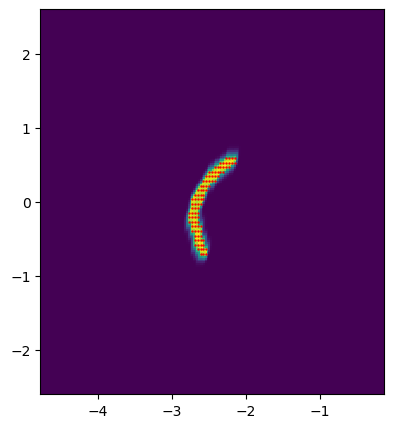

In [56]:
N_data = len(dat_x[::1])
bw_red = .1455#.16
# Fit KDE to control points, and evaluate at constrol points [todo, bandwidth optimization?]
log_p_thresh = kde_fit_and_log_eval(dat_x[::1],dat_z[::1], dat_x[::1],dat_z[::1],bw=bw_red)
inter_sum_thresh = (1./N_data)*( jnp.log((1./N_data)) - log_p_thresh )
neg_KL_thresh = -jnp.sum(inter_sum_thresh)
print(neg_KL_thresh)
pdf_out_thresh = kde_fit_and_eval(dat_x[::1],dat_z[::1], x_eval, z_eval, bw=bw_red).reshape(X.shape)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(8,5)
ax.pcolormesh(X, Z, pdf_out_thresh)
ax.scatter(dat_x[::1],dat_z[::1],color='r',s=.5)

ax.set_aspect('equal')



In [60]:
dat = np.array([dat_x,dat_z])

In [62]:
np.save('dat_w17_paper.npy',dat)

In [57]:
0.01*(u.kpc/u.Myr).to(u.km/u.s)
#sample from prior and look at Log L values. are they all minus infinity?

9.777922216807891

In [58]:
z_prog

np.float64(0.5439901003505554)

In [59]:
#dir(prior)
np.pi/2

1.5707963267948966

In [60]:
# from nautilus import Prior
# from nautilus import Sampler


# prior = Prior()


# prior.add_parameter('y_prog',dist=(-15.,15))
# prior.add_parameter('speed', dist=(0.01,0.15)) #was from 0.02 before. 
# prior.add_parameter('vel_theta', dist=(1.04111386-0.6, 1.04111386+0.6))
# prior.add_parameter('vel_phi', dist=(0, 1.04111386+0.6))
# prior.add_parameter('log10_M_prog', dist=( 4.5,7.5))
# prior.add_parameter('log10_m_halo', dist=( 9.5,12.5))
# prior.add_parameter('r_s', dist=( 3.,10.))
# prior.add_parameter('gamma', dist=( 0.,2.)) #fixed within this range
# prior.add_parameter('beta', dist=( 2.,4.)) #fixed within this range
# prior.add_parameter('t_age', dist=( 500.,3_000.))



# cost_naut = lambda params: vectorized_cost(params, N_data)




In [61]:
0.2045*(u.kpc/u.Myr).to(u.km/u.s)

199.95850933372137

In [62]:
#testing new ranges

from nautilus import Prior
from nautilus import Sampler


prior = Prior()


prior.add_parameter('y_prog',dist=(-15.,15))
prior.add_parameter('speed', dist=(0.01,0.2045)) #was from 0.02 before. 
prior.add_parameter('vel_theta', dist=(0,  jnp.pi/2.))
prior.add_parameter('vel_phi', dist=(0, jnp.pi))
prior.add_parameter('log10_M_prog', dist=( 4.2,7.1))
prior.add_parameter('log10_m_halo', dist=( 9.5,12.5))
prior.add_parameter('r_s', dist=( 3.,10.))
prior.add_parameter('gamma', dist=( 0.,2.)) #fixed within this range
prior.add_parameter('beta', dist=( 2.,4.)) #fixed within this range
prior.add_parameter('t_age', dist=( 500.,3_000.))



cost_naut = lambda params: vectorized_cost(params, N_data)




In [63]:
sampler = Sampler(prior, cost_naut, n_live=1000,vectorized=True,n_batch=500) #500, 500
sampler.run(verbose=True, n_eff=15_000,f_live=0.0001)

Starting the nautilus sampler...
Please report issues at github.com/johannesulf/nautilus.
Status    | Bounds | Ellipses | Networks | Calls    | f_live | N_eff | log Z    
Computing | 16     | 6        | 4        | 51500    | N/A    | 12180 | +0.68    

KeyboardInterrupt: 

In [64]:
points, log_w, log_l = sampler.posterior(equal_weight=False)


save_dict = dict(points=points, log_w=log_w, log_l=log_l)
points.shape
np.save('UDG_KL_w17c5_narrowmprog',save_dict)

In [65]:
np.save('constrained_values_truth_UDG_KL_w17c5_narrowmprog',constrained_values_truth)

best_idx = np.argmax(log_l)  # Index of the highest log-likelihood
best_params = points[best_idx]


In [66]:
print(best_params)

[1.00796400e-01 1.34978804e-01 1.08222360e+00 1.63688160e-01
 4.65265591e+00 1.07795992e+01 7.74444880e+00 1.84697746e+00
 2.56206569e+00 1.95193875e+03]


In [67]:
# best_params = np.load('UDG_KL_bestparams_test.npy',allow_pickle=True) #same here as in contour notebook
# print(best_params)

#best_idx = np.argmax(log_l)  # Index of the highest log-likelihood
#best_params = points[best_idx]


In [68]:
# print(best_params)

## Plot best fit stream

In [69]:
#change below from best contours new method


y_prog_fit = best_params[0]#50 # kpc
speed_fit = best_params[1]# 0.16
vel_theta_fit =best_params[2]# 2.4
vel_phi_fit=best_params[3]#2.5
log10_M_prog_fit= best_params[4]#9
log10_m_halo_fit = best_params[5]
r_s_fit = best_params[6]
gamma_fit =best_params[7]
beta_fit =best_params[8]
t_age_fit = best_params[9]




# # From previous run! narrow run
# y_prog_fit =2.65872594e+00 #2.01032132e+00# best_params[0]#50 # kpc
# speed_fit =  7.22142466e-02 #5.25066710e-02#best_params[1]# 0.16
# vel_theta_fit = 1.28624602e+00 # 1.21807936e+00#best_params[2]# 2.4
# vel_phi_fit= 8.38097322e-01# 6.98156419e-01#best_params[3]#2.5
# log10_M_prog_fit=  5.19682127e+00# 5.16898165e+00#best_params[4]#9
# log10_m_halo_fit = 1.10663545e+01 #1.09865430e+01 #best_params[5]
# r_s_fit = 4.29505576e+00# 6.22636219e+00#best_params[6]
# gamma_fit = 1.64999493e-03 #2.59218841e-01#best_params[7]
# beta_fit = 2.90663982e+00 #2.39872337e+00#best_params[8]
# t_age_fit =  1.81367747e+03 #2.27634412e+03# best_params[9]



In [70]:

UDG_stream_prog1 = dict(x_prog=x_prog,y_prog=y_prog_fit,z_prog=z_prog,speed=speed_fit ,vel_theta=vel_theta_fit,\
                          vel_phi=vel_phi_fit, log10_M_prog=log10_M_prog_fit,
                        log10_m_disk=jnp.log10(5e10), a_disk=3.0,b_disk=0.2,log10_m_halo=log10_m_halo_fit,r_s=r_s_fit,gamma=gamma_fit,\
                          beta=beta_fit,#3.674,
                         t_age=t_age_fit, N_arm=4_000) #4_000

In [71]:
UDG_stream_dict1 = gen_stream(**UDG_stream_prog1)


In [72]:
#change to correct coords...

pos_today_fit = np.array([x_prog,y_prog_fit, z_prog ])

In [73]:
v_x_hat = jnp.sin(vel_theta_fit)*jnp.cos(vel_phi_fit)
v_y_hat = jnp.sin(vel_theta_fit)*jnp.sin(vel_phi_fit)
v_z_hat = jnp.cos(vel_theta_fit) 
velocity_today_fit = jnp.array([v_x_hat, v_y_hat, v_z_hat])*speed_fit
velocity_today_fit*(u.kpc/u.Myr).to(u.km/u.s)

Array([114.98211482,  18.99112946,  61.94750955], dtype=float64)

## Now calculate range of allowed enclosed masses

In [74]:
#DM halo enclosed mass...
rho0_fit = np.log10(get_nfw_rho0(10**log10_m_halo_fit,r_s_fit ))
print(rho0_fit)
trial_pot = get_general_NFW_potential(dict(rho0=10**rho0_fit, gamma=gamma_fit, beta=beta_fit,
                                              r_s=r_s_fit))


7.031859196035909


In [75]:
from astropy.constants import G
G_jax = jnp.array(G.to((u.kpc**3 / (u.Msun * u.Myr**2))).value)

In [76]:
#get it only enclosed here...
R_enclosed = np.sqrt(x_prog**2+y_prog_fit**2 +z_prog**2) #kpc...


In [77]:

#trial_pot = JaxStreams.GeneralNFWPotential(r_s=r_s,rho0=rho0_BF,gamma=gamma,beta=beta,units=usys)
a_r_Jax = trial_pot.acceleration(jnp.array([R_enclosed,0.0,0.0]),0.0) #needs to be within kpc

# a_r = -G M_enc / r^2
M_halo_enc_jax = (-a_r_Jax)*(R_enclosed**2) / G_jax




In [78]:
M_halo_enc_jax / 1e9

Array([10.82521927,  0.        ,  0.        ], dtype=float64)

## Calculate Jacobi radius of this configuration

In [79]:
prog_orb1 =UDG_stream_dict1['prog_orb']
prog_orb1.ts
r_orb1 = jnp.sqrt(jnp.sum(prog_orb1.ys[:,:3]**2,axis=1))

In [80]:
#y_prog_fit
r_orb1[-1]

Array(1.78277926, dtype=float64)

In [81]:
#R_enclosed = np.sqrt(x_prog**2+y_prog_fit**2 +z_prog**2)
rJ = R_enclosed*(10**log10_M_prog_fit/(M_halo_enc_jax))**(1/3)

In [82]:
gamma_fit

np.float64(1.846977455478465)

In [83]:

a_r_Jax_min = trial_pot.acceleration(jnp.array([np.min(r_orb1),0.0,0.0]),0.0) #needs to be within kpc

# a_r = -G M_enc / r^2
M_halo_enc_jax_min = (-a_r_Jax)*(np.min(r_orb1)**2) / G_jax


rJ_min =  np.min(r_orb1)*(10**log10_M_prog_fit/(M_halo_enc_jax_min))**(1/3)

In [84]:
print(rJ)
print(rJ_min)

[0.0332144       inf       inf]
[0.02415761        inf        inf]


(0.35, 3.75)

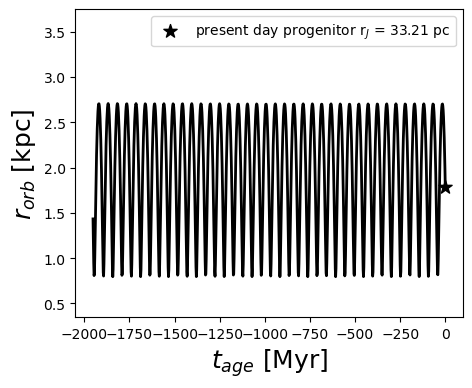

In [85]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(5,4)
ax.plot(prog_orb1.ts-t_age_fit, r_orb1,zorder=5,color='k',lw=2,)
ax.set_ylabel(r'$r_{orb}$ [kpc]', fontsize=18)
ax.set_xlabel(r'$t_{age}$ [Myr]', fontsize=18)
ax.scatter(0, r_orb1[-1], marker = '*', s= 100,c='black', label=r'present day progenitor r$_J$ = ' + str(np.round(rJ[0]*u.kpc.to(u.pc), 2)) + ' pc')
ax.legend()
ax.set_ylim([0.35,3.75])

In [86]:
rJ*u.kpc.to(u.pc)

Array([33.21440326,         inf,         inf], dtype=float64)

In [87]:
10**log10_M_prog_fit/10**5

np.float64(0.449423639216205)

<>:16: SyntaxWarning: invalid escape sequence '\o'
<>:16: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_194542/2582932543.py:16: SyntaxWarning: invalid escape sequence '\o'
  ax.scatter(x_prog, z_prog, marker='*', s=100, label=r'm$_{\rm prog}$ = ' + str(np.round(10**log10_M_prog_fit/10**5,2)) + ' x $10^5$ M$_{\odot}$', color='black')


pos = [-1.99  0.1   0.54] kpc
vel = [114.98  18.99  61.95] km/s
M$_{\rm halo,tot}$ = 0.6x $10^{11}$M$_{\odot}$


Text(0.2, 0, 'UDG DW1 center')

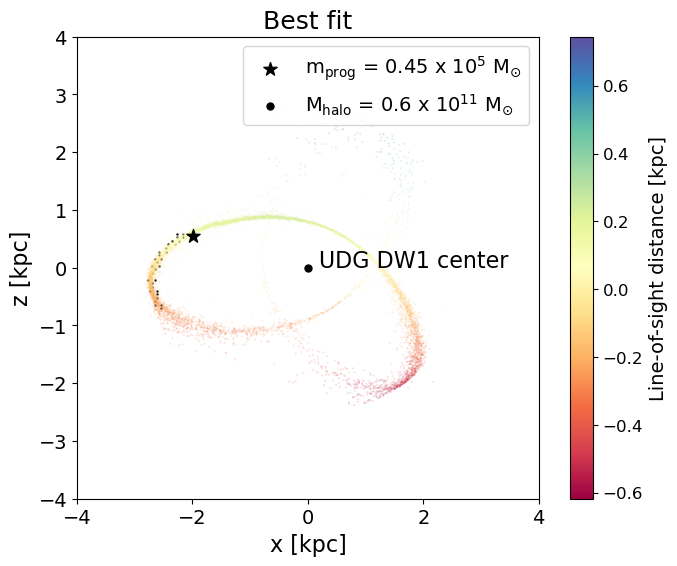

In [88]:
import matplotlib.pyplot as plt

# Create the figure and axis
f, ax = plt.subplots(1, 1, figsize=(8, 6), sharex=True, sharey=True)
ax.set_title('Best fit', fontsize=18)  # Larger title
ax.set_aspect('equal', adjustable='box')
# Scatter plot of stream
col = UDG_stream_dict1['stream'][:,1]
ax.scatter(dat_x[::3], dat_z[::3], color='black', s=0.5)#,# cmap='Blues',
          # label='vel = ' + str(np.round(velocity_today_fit * (u.kpc/u.Myr).to(u.km/u.s), 2)) + ' km/s')


sc = ax.scatter(UDG_stream_dict1['stream'][:, 0], UDG_stream_dict1['stream'][:, 2], cmap='Spectral',
                s=0.006, c=col, rasterized=True)#, label='pos = ' + str(np.round(pos_today_fit, 2)) + ' kpc')

ax.scatter(x_prog, z_prog, marker='*', s=100, label=r'm$_{\rm prog}$ = ' + str(np.round(10**log10_M_prog_fit/10**5,2)) + ' x $10^5$ M$_{\odot}$', color='black')
ax.scatter(0,0, marker='.', s=100, color='black', label=r'M$_{ \rm halo}$ = ' + str(np.round(10**log10_m_halo_fit/ 1e11, 2)) + r' x $10^{11}$ M$_{\odot}$')
           #label=r'M$_{ \rm halo,enclosed}$ = ' + str(np.round(M_halo_enc_jax[0] / 1e9, 2)) + r' x $10^9$ M$_{\odot}$')

print('pos = ' + str(np.round(pos_today_fit, 2)) + ' kpc')
print('vel = ' + str(np.round(velocity_today_fit * (u.kpc/u.Myr).to(u.km/u.s), 2)) + ' km/s')
print(r'M$_{\rm halo,tot}$ = ' + str(np.round(10**log10_m_halo_fit / 1e11, 2)) + r'x $10^{11}$M$_{\odot}$')

# Axis labels with larger font
ax.set_xlabel('x [kpc]', fontsize=16)
ax.set_ylabel('z [kpc]', fontsize=16)

# Set tick label sizes
ax.tick_params(axis='both', labelsize=14)

# Limits
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])

# Legend
ax.legend(loc='upper right', fontsize=14)

# Colorbar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Line-of-sight distance [kpc]', fontsize=14)
cbar.ax.tick_params(labelsize=12)

# Annotate with text
ax.text(0.2, 0, 'UDG DW1 center', size=16)
# ax.text(-1, 1.2, 'Leading arm', size=14)
# ax.text(-3.2, -1.2, 'Trailing arm', size=14)

#ax.text(-3, -2.5, r'$r_J$ = ' + str(np.round(rJ[0]*u.kpc.to(u.pc), 2)) + ' pc', size=14)
#ax.text(-3, -3, r'M$_{ \rm halo,enclosed}$ = ' + str(np.round(M_halo_enc_jax[0] / 1e9, 2)) + r'x $10^9$M$_{\odot}$', size=14)
#ax.text(-3, -3.5, r'M$_{\rm halo,tot}$ = ' + str(np.round(10**log10_m_halo_fit / 1e11, 2)) + r'x $10^{11}$M$_{\odot}$', size=14)
#f.savefig('UDG_true_vs_fit_wider.pdf', dpi=300)

<>:20: SyntaxWarning: invalid escape sequence '\o'
<>:20: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_194542/2889072145.py:20: SyntaxWarning: invalid escape sequence '\o'
  label=r'$m_{\rm prog}$ = ' + str(np.round(10**log10_M_prog_fit / 10**5, 2)) + ' x $10^5$ M$_{\odot}$', color='black')


pos = [-1.99  0.1   0.54] kpc
vel = [114.98  18.99  61.95] km/s
M$_{\rm halo,tot}$ = 0.6x $10^{11}$M$_{\odot}$


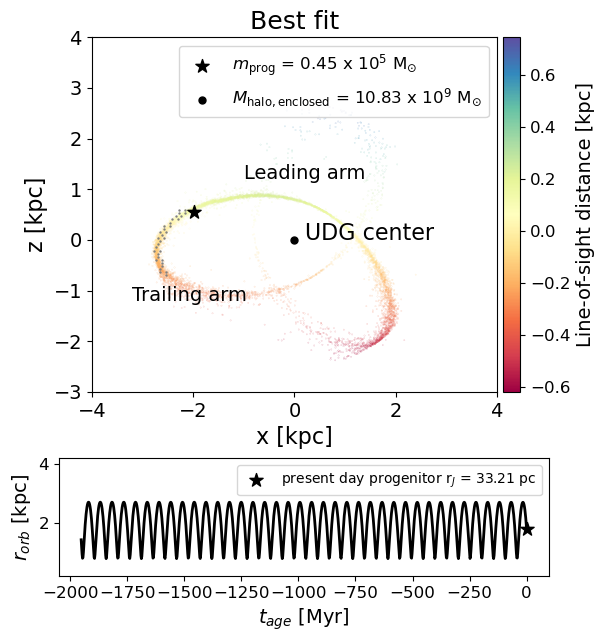

In [89]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create a figure with a main panel and a smaller subpanel below
fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1], hspace=0.28)

# Main panel (stream plot)
ax_main = fig.add_subplot(gs[0])
ax_main.set_title('Best fit', fontsize=18)
ax_main.set_aspect('equal', adjustable='box')

# Scatter plot for stream
col = UDG_stream_dict1['stream'][:, 1]

sc = ax_main.scatter(UDG_stream_dict1['stream'][:, 0], UDG_stream_dict1['stream'][:, 2],
                     cmap='Spectral', s=0.006, c=col, rasterized=True)

ax_main.scatter(x_prog, z_prog, marker='*', s=100,
                label=r'$m_{\rm prog}$ = ' + str(np.round(10**log10_M_prog_fit / 10**5, 2)) + ' x $10^5$ M$_{\odot}$', color='black')
ax_main.scatter(0, 0, marker='.', s=100, color='black',
                label=r'$M_{ \rm halo,enclosed}$ = ' + str(np.round(M_halo_enc_jax[0] / 1e9, 2)) + r' x $10^9$ M$_{\odot}$')

ax_main.set_xlim([-4, 4])
ax_main.set_ylim([-3, 4])
ax_main.set_ylabel('z [kpc]', fontsize=16)
ax_main.set_xlabel('x [kpc]', fontsize=16)
ax_main.tick_params(axis='both', labelsize=14)
ax_main.legend(loc='upper right', fontsize=12)

# Colorbar
cbar = plt.colorbar(sc, ax=ax_main, pad=0.01)
cbar.set_label('Line-of-sight distance [kpc]', fontsize=14)
cbar.ax.tick_params(labelsize=12)

# Annotations
ax_main.text(0.2, 0, 'UDG center', size=16)
ax_main.text(-1, 1.2, 'Leading arm', size=14)
ax_main.text(-3.2, -1.2, 'Trailing arm', size=14)

# Subpanel (orbital radius)
ax_sub = fig.add_subplot(gs[1])


print('pos = ' + str(np.round(pos_today_fit, 2)) + ' kpc')
print('vel = ' + str(np.round(velocity_today_fit * (u.kpc/u.Myr).to(u.km/u.s), 2)) + ' km/s')
print(r'M$_{\rm halo,tot}$ = ' + str(np.round(10**log10_m_halo_fit / 1e11, 2)) + r'x $10^{11}$M$_{\odot}$')

# Shrink width and center
centered_width = 0.7  # 70% width
x_center = 0.5 - centered_width / 2
box = ax_sub.get_position()
ax_sub.set_position([x_center, box.y0, centered_width, box.height])

ax_sub.plot(prog_orb1.ts - t_age_fit, r_orb1, zorder=5, color='k', lw=2)
ax_sub.scatter(0, r_orb1[-1], marker='*', s=100, c='black',
               label=r'present day progenitor r$_J$ = ' + str(np.round(rJ[0]*u.kpc.to(u.pc), 2)) + ' pc')
ax_sub.set_ylabel(r'$r_{orb}$ [kpc]', fontsize=14)
ax_sub.set_xlabel(r'$t_{age}$ [Myr]', fontsize=14)
ax_sub.set_ylim([0.2, 4.2])
ax_sub.tick_params(axis='both', labelsize=12)
ax_sub.legend(fontsize=10)
ax_main.scatter(dat_x[::3], dat_z[::3], color='grey', s=0.5)

fig.savefig('UDG_BestFit_w17c5_narrowmprog.pdf', dpi=300)
